<a href="https://colab.research.google.com/github/shounakk05/ML_basic_projects/blob/main/House_price_prediction_prj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We are going to use Regression in this ML project

Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Importing the California house price data

In [ ]:
houseprice_dataset = fetch_california_housing()
print(houseprice_dataset)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [ ]:
#loading the dataset to a Pandas Dataframe
houseprice_df = pd.DataFrame(houseprice_dataset.data, columns=houseprice_dataset.feature_names)

In [ ]:
houseprice_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
#Adding the target price column to the dataframe
houseprice_df['price'] = houseprice_dataset.target

In [ ]:
houseprice_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
#Checking the number of rows and columns in dataframe
houseprice_df.shape

(20640, 9)

In [ ]:
#Checking for missing values
houseprice_df.isnull().sum() #This dataset has no null values

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
price,0


In [ ]:
#Statistical analysis
houseprice_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Understanding the correlation between various features

In [ ]:
correlation = houseprice_df.corr()
print(correlation)

              MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc      1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge   -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms    0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms  -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population  0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup    0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude   -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude  -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
price       0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

            Latitude  Longitude     price  
MedInc     -0.079809  -0.015176  0.688075  
HouseAge    0.011173  -0.108197  0.105623  
AveRooms    0.106389  -0.027540  0.151948  
AveBedrms   0.069721   0.013344 -0.046701  
Populatio

<Axes: >

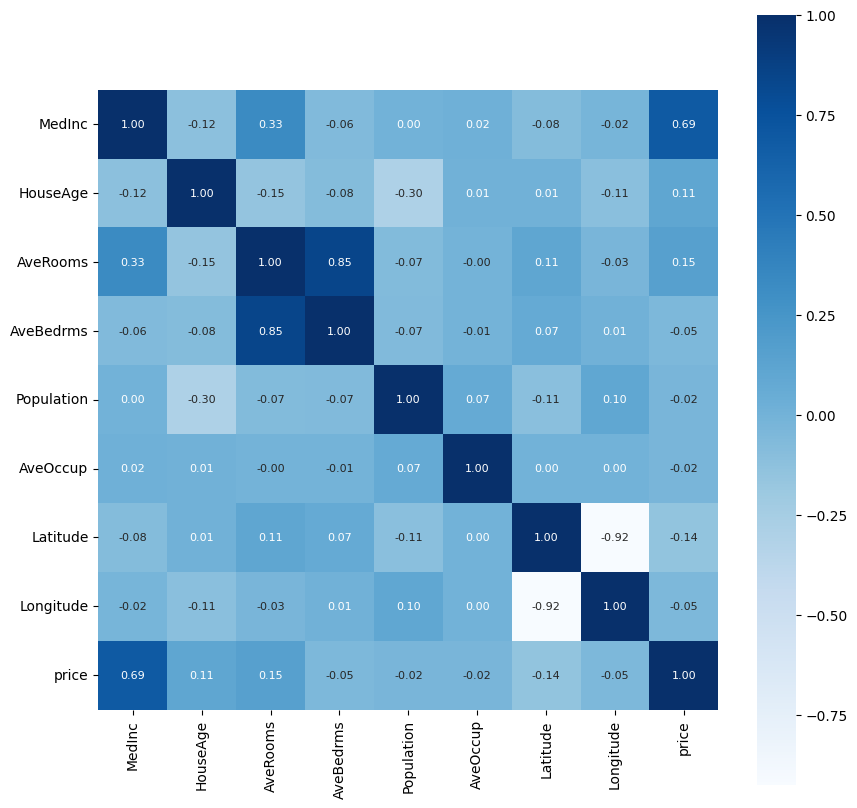

In [ ]:
#Plotting correlation using a heatmap
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size':8}, cmap='Blues')

Splitting into data and labels

In [ ]:
X = houseprice_df.drop(['price'], axis=1)
Y = houseprice_df['price']

In [ ]:
print(X)
print(Y)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

Splitting the data into Training data and Testing data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.2, random_state = 2)

In [ ]:
print(X.shape, Y.shape, X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(20640, 8) (20640,) (4128, 8) (4128,) (16512, 8) (16512,)


Model Training using XGBoost Regressor

In [ ]:
#XGBoost Regressor is a type of decision tree model(ensemble model)
#Loading the model
regressor = XGBRegressor()

In [ ]:
#Training the model with X_train
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

Evaluating the model

In [ ]:
#accuracy_score cannot be used for regression instead we use metrics
#accuracy for prediction on training data
train_data_pred = regressor.predict(X_train)

In [ ]:
print(train_data_pred)

[0.5542971  1.4392663  0.94416255 ... 1.7831631  1.6892765  0.80984396]


In [ ]:
#using R squared error(rsquared error and mean absolute error used for regression model)
score_01 = metrics.r2_score(Y_train, train_data_pred) #r2_score will give you Rsquared error for the both the parameters

#using Mean Absolute error
score_02 = metrics.mean_absolute_error(Y_train, train_data_pred) #this predicts values of the difference between the predicted and actual values

In [ ]:
print("R-squared error:", score_01, " Mean absolute error:", score_02)

R-squared error: 0.9840972807893258  Mean absolute error: 0.10345322954092608


Predicting values for testing data

In [ ]:
test_data_pred = regressor.predict(X_test)
print(X_test)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
10385  6.4114      15.0  7.527559   1.049869      2529.0  3.318898     33.60   
1943   4.1843      12.0  6.330084   1.041783      2033.0  2.831476     38.62   
7490   1.7411      35.0  5.369159   1.294393       909.0  4.247664     33.93   
16889  3.4412      39.0  4.173405   1.074573      2156.0  1.937107     37.59   
11416  7.8195      16.0  8.602349   1.058725      2142.0  3.593960     33.70   
...       ...       ...       ...        ...         ...       ...       ...   
13336  3.0598      13.0  4.310056   1.069832       776.0  2.167598     34.04   
12043  6.8089       5.0  7.191667   0.975000      1109.0  3.080556     33.88   
9042   4.6417      17.0  6.829201   1.074380      1219.0  3.358127     34.69   
19714  1.5281      29.0  5.095890   1.095890      1137.0  3.115068     39.29   
917    5.0824      23.0  5.508949   1.060403      2530.0  2.829978     37.52   

       Longitude  
10385    -117.65  
1

In [ ]:
score_03 = metrics.r2_score(Y_test, test_data_pred)

score_04 = metrics.mean_absolute_error(Y_test, test_data_pred)

In [ ]:
print("R-squared error:", score_03, " Mean absolute error:", score_04)

R-squared error: 0.7957803310063778  Mean absolute error: 0.35475612159658004


Plotting the error values

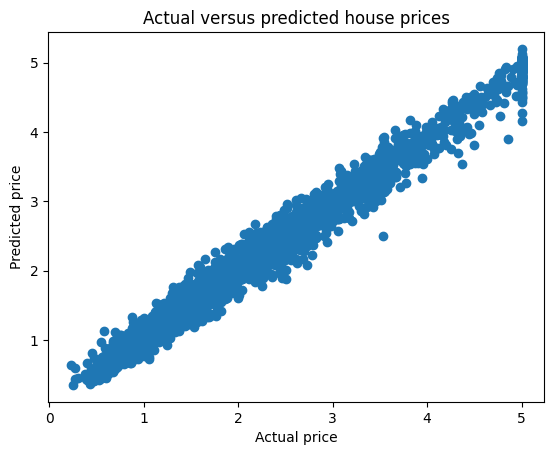

In [ ]:
plt.scatter(Y_train, train_data_pred)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual versus predicted house prices")
plt.show()

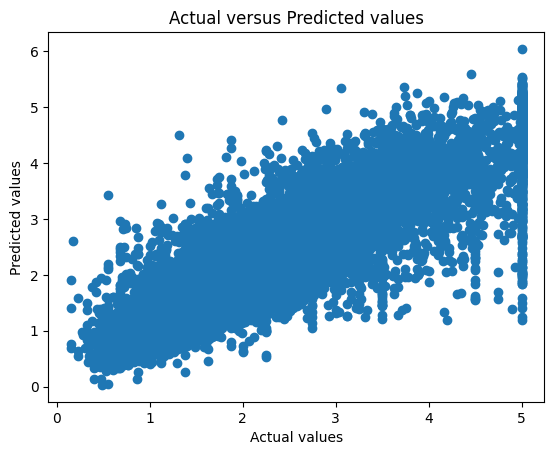

In [ ]:
#Visualization for the test values
plt.scatter(Y_test, test_data_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual versus Predicted values")
plt.show()